In [1]:
from scipy.fft import fft, fft2, ifft2
import matplotlib.pyplot as plt
import scipy
import numpy as np
import scipy.stats as stats
import scipy.integrate as integrate
import math
from math import e, log
import pandas as pd
from sklearn import datasets
import seaborn as sns

In [2]:
max_l = 100
l = 0
Pr_er = 10**(-3)
sigma = 0.8
H = np.array([[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], 
             [1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0], 
             [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
             [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
             [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
             [0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1]])

In [3]:
d_c = 6

In [4]:
def find_nearest(array,value):
    idx = np.searchsorted(array, value, side="left")
    if idx > 0 and (idx == len(array) or math.fabs(value - array[idx-1]) < math.fabs(value - array[idx])):
        return array[idx-1]
    else:
        return array[idx]

In [5]:
def phi(x):
    return -np.log(np.tanh(x / 2))

In [6]:
def normal(x, mu,sigma):
    '''
    function for normal calculating density of normal distribution with given parametrs in the poiny
    '''
    return np.exp(-pow(mu - x, 2)/(2 * pow(sigma, 2))) / (sigma * np.sqrt(2*np.pi))

In [7]:
def mv(sigma, Pr_er):
    '''
    returns arguments for density of mv on the first step
    '''
    l = 2/(sigma**2) - 3 * 2/sigma
    r = 3 * 2/sigma + 2/(sigma**2)
    step = (r - l) * Pr_er
    ans = []
    for i in range(int(1/Pr_er) + 1):
        ans.append(l)
        l += step
    return np.array(ans)

In [8]:
def generate_density_mv(sigma, Pr_er):
    '''
    returns array with values of normal density using three sigma rule
    '''
    l = 2/(sigma**2) - 3 * 2/sigma
    r = 3 * 2/(sigma) + 2/(sigma**2)
    step = (r - l) * Pr_er
    ans = []
    for i in range(int(1/Pr_er) + 1):
        ans.append(normal(l, 2/(sigma**2), 4/(sigma ** 2)))
        l += step
    return np.array(ans)

In [9]:
p_v = generate_density_mv(sigma, Pr_er)

In [10]:
mv_init = mv(sigma, Pr_er)

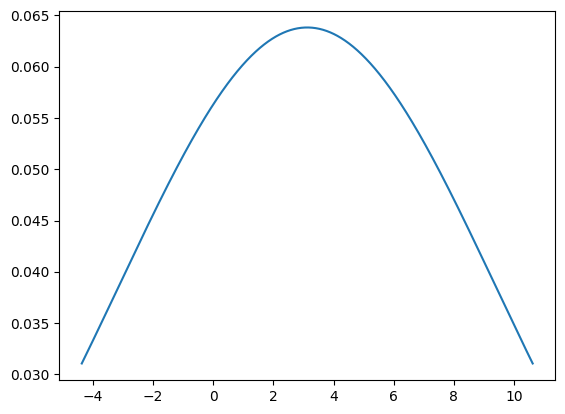

In [13]:
plt.plot(mv_init, p_v)

In [26]:
def mv_vector_func(mv_init):
    '''
    creates double array with sign + absolute value of mv
    '''
    ans = np.zeros(shape=(len(mv_init), 2))
    for i in range(len(p_v)):
        if mv_init[i] > 0:
            ans[i] = [0, abs(mv_init[i])]
        else:
            ans[i] = [1, abs(mv_init[i])]
    return ans

In [27]:
mv_vector = mv_vector_func(mv_init)

In [33]:
def z_arguments(mv_vector):
    '''
    computes arguments for density of Z
    '''
    z_i = np.zeros(shape=(len(mv_vector), 2))
    for i in range(len(mv_vector)):
        z_i[i] = [mv_vector[i, 0], phi(mv_vector[i, 1])]
    return z_i

In [34]:
def merge_density(mv, p_v):
    '''
    creates dictionary of argument and value of density 
    '''
    return dict(zip(mv, p_v))

In [35]:
merged_density = merge_density(mv_init, p_v)

In [36]:
z = np.array(z_arguments(mv_vector))

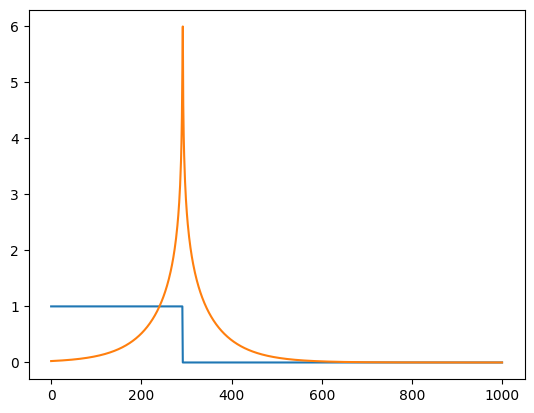

In [37]:
plt.plot(z)

In [41]:
def compute_z_density(z, mv_init, merged_density):
    '''
    compute values of z density
    '''
    ans = np.zeros(shape=(2, len(mv_init)))
    for i in range(len(z)):
        ans[0, i] = (1/np.sinh(z[i, 1])) * merged_density[mv_init[i]]
        ans[1, i] = (1/np.sinh(z[i, 1])) * merged_density[mv_init[i]]
    return ans

In [42]:
p_z = compute_z_density(z, mv_init, merged_density)

In [ ]:
def w_compute(z):
    

In [29]:
def density_w(p_z):
    '''
    computes values of w density
    '''
    return scipy.fft.ifft2(scipy.fft.fft2(p_z) ** (d_c - 1)).real

In [30]:
density_w = density_w(p_z)

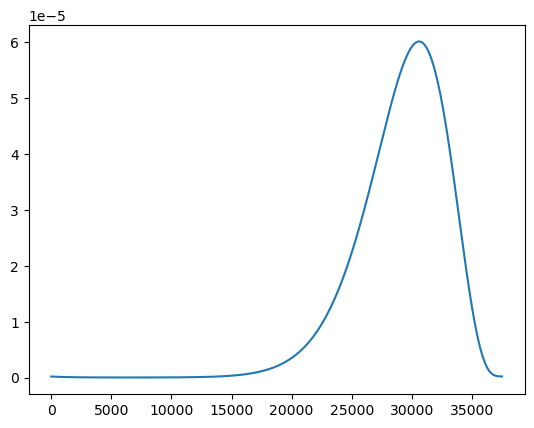

In [42]:
plt.plot(density_w[0])

In [53]:
def p_c(w):
    ans = np.zeros(shape=(len(w), 2))
    for i in range(len(w)):
        if (w[i, 0] == 0):
            ans[i] = [0, phi(w[i, ])]
        else:
            ans[i] = [1, phi(-w[i, 1])]
    return ans

In [113]:
c_dist = p_c(w)

/var/folders/x6/b_ylqyd127s0ckfw_r19b2880000gn/T/ipykernel_1218/897705512.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  ans[i] = [0, phi(w[i, 1])]


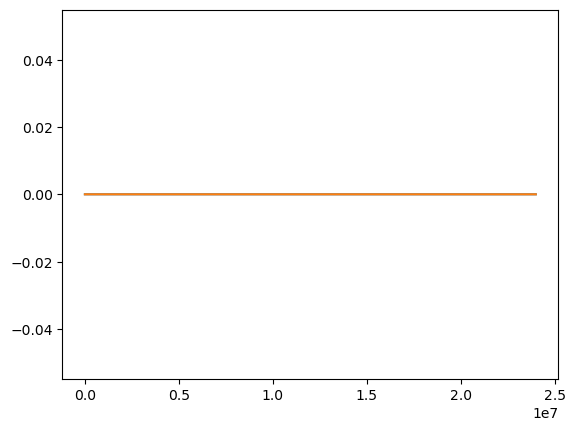

In [115]:
plt.plot(c_dist)

In [ ]:
def p_v_update(p_v, c_dist):
    

In [11]:
def stop_kritetia():
    result = integrate.quad(lambda x: p_v(x), -inf, 0)
    return (result < Pr_er)

In [ ]:
while True:
    z = []
    w = [0, 0]
    if (l == 1):
        z_compute()
        w_compute()
        
        p_c_update()
        
    if stop_kritetia()
    return l

In [ ]:
array = np